<a href="https://colab.research.google.com/github/shawterryann/DataSets/blob/main/Real_Estate_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Pre-load Packages
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math

In [35]:
from google.colab import files
uploaded = files.upload()
import io
listings= pd.read_csv(io.BytesIO(uploaded['newark-properties.csv']))


Saving newark-properties.csv to newark-properties (2).csv


In [36]:
listings.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Single Family Residential,112 Heller Pkwy,Newark,NJ,7104,675000,5.0,4.0,...,Active,NaN,NaN,https://www.redfin.com/NJ/Newark/112-Heller-Pk...,NJMLS,23005821,N,Y,40.776363,-74.169956
1,MLS Listing,NaN,Multi-Family (2-4 Unit),425 S 16Th St,Newark City,NJ,07103-1651,315000,5.0,2.0,...,Active,NaN,NaN,https://www.redfin.com/NJ/Newark/425-S-16th-St...,GSMLS,3830847,N,Y,40.741447,-74.206308
2,MLS Listing,NaN,Condo/Co-op,40 Rutgers Dr,Newark City,NJ,07103-3078,312999,2.0,2.5,...,Active,March-4-2023 12:00 PM,March-4-2023 02:00 PM,https://www.redfin.com/NJ/Newark/40-Rutgers-Dr...,GSMLS,3830841,N,Y,40.736559,-74.183596
3,MLS Listing,NaN,Single Family Residential,1 South Stanley Rd,South Orange,NJ,7079,1065000,5.0,4.0,...,Active,March-4-2023 12:00 PM,March-4-2023 03:00 PM,https://www.redfin.com/NJ/South-Orange/1-S-Sta...,BRIGHT MLS,NJES2000126,N,Y,40.745396,-74.239277
4,MLS Listing,NaN,Single Family Residential,9 Terrace Pl,Belleville Twp.,NJ,7109,379900,4.0,2.0,...,Active,March-4-2023 02:30 PM,March-4-2023 04:30 PM,https://www.redfin.com/NJ/Belleville/9-Terrace...,GSMLS,3830781,N,Y,40.781485,-74.151694


In [37]:
# Get a list of column names

listings.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [38]:
# Drop unwanted columns

listings = listings[['PROPERTY TYPE', 'PRICE', 'BEDS','BATHS', 'SQUARE FEET', 'LOT SIZE']]

In [39]:
#Check null value distribution
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PROPERTY TYPE  350 non-null    object 
 1   PRICE          350 non-null    int64  
 2   BEDS           335 non-null    float64
 3   BATHS          328 non-null    float64
 4   SQUARE FEET    69 non-null     float64
 5   LOT SIZE       287 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 16.5+ KB


<AxesSubplot:>

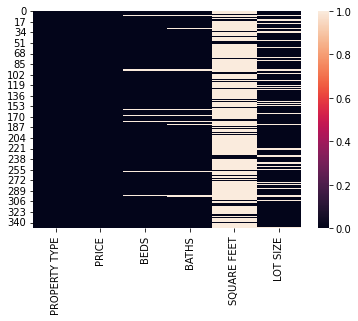

In [40]:
#Explore missing values

sns.heatmap(listings.isnull(), cbar=True)

<AxesSubplot:>

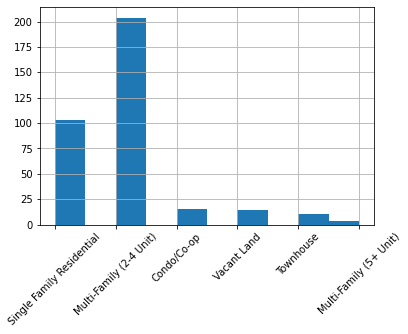

In [41]:
#Explore distribution frequency of property types
listings['PROPERTY TYPE'].hist(xrot=45.0)

In [42]:
listings['PROPERTY TYPE'].unique()

array(['Single Family Residential', 'Multi-Family (2-4 Unit)',
       'Condo/Co-op', 'Vacant Land', 'Townhouse',
       'Multi-Family (5+ Unit)'], dtype=object)

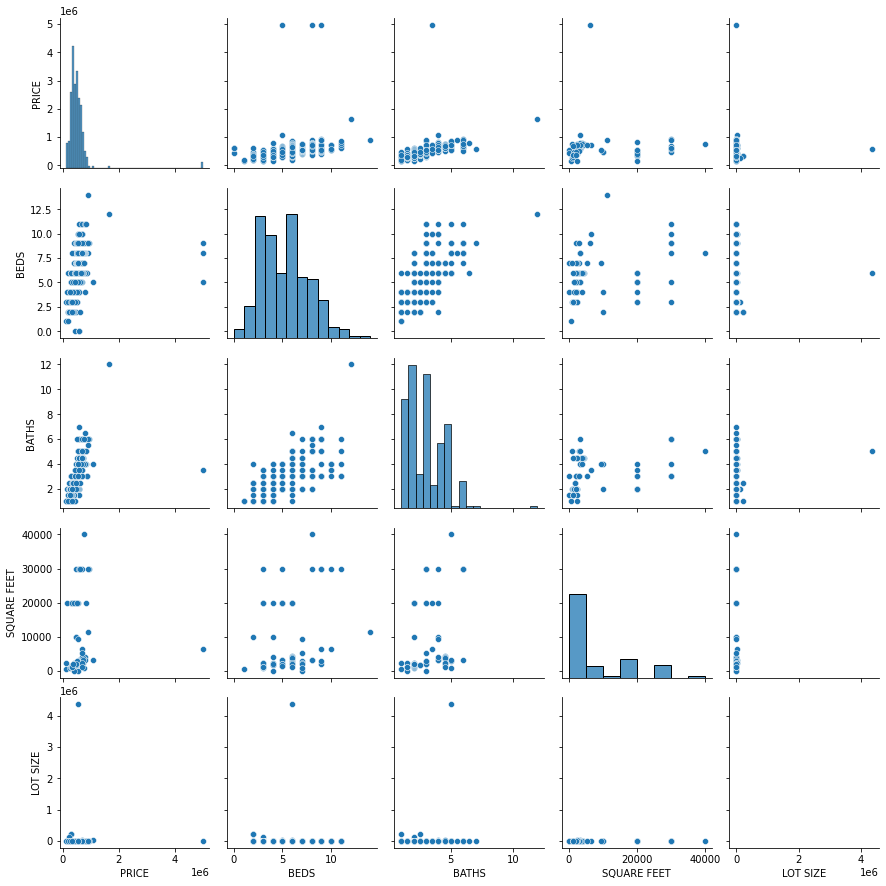

In [43]:



removed_property=[ 'Vacant Land','Multi-Family(5+ Unit)']

listings.drop(listings[listings['PROPERTY TYPE'].isin(removed_property)].index, inplace= True)

sns.pairplot(listings)

The relationship between the predictors and the target variable PRICE is as follows: There's an increase with PRICE with number of BEDROOMS. However, there are few variations in PRICE across BEDROOMS. the same holds true for BATHROOMS, which has an increase in PRICE with number of BATHROOMS. Nevertheless, there is not much variation in PRICE, except for a few outliers. In regards to SQR FT, most of the properties are in the 10,000 range, with some levels of variation or perhaps outliers.  Lastly, LOT SIZE shows a linear relationship with PRICE. There is no constant variation with this variable. This could be potentially problematic in model prediction.

In [47]:
#summary stastics
listings.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
count,3.170000e+02,316.000000,310.000000,50.000000,2.640000e+02
mean,5.295891e+05,5.291139,2.958065,3012.580000,2.228316e+04
std,4.700584e+05,2.244722,1.431222,2206.607425,2.693073e+05
min,1.350000e+05,0.000000,1.000000,2.000000,4.000000e+00
25%,3.500000e+05,3.000000,2.000000,1774.500000,2.500000e+03
50%,4.790000e+05,5.000000,3.000000,2400.000000,3.049000e+03
75%,5.990000e+05,7.000000,4.000000,3821.250000,3.939750e+03
max,4.980000e+06,12.000000,12.000000,9999.000000,4.369068e+06


In [45]:
#filter out record matching criteria
listings.drop(listings[listings['SQUARE FEET']> 10000].index, inplace=True)



In [46]:
# Mean imputation

imputed =listings.fillna(listings.mean())
imputed.describe()

<ipython-input-46-7cf809b6f776>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  imputed =listings.fillna(listings.mean())


,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
count,3.170000e+02,317.000000,317.000000,317.000000,3.170000e+02
mean,5.295891e+05,5.291139,2.958065,3012.580000,2.228316e+04
std,4.700584e+05,2.241168,1.415281,868.919561,2.456872e+05
min,1.350000e+05,0.000000,1.000000,2.000000,4.000000e+00
25%,3.500000e+05,3.000000,2.000000,3012.580000,2.613000e+03
50%,4.790000e+05,5.000000,3.000000,3012.580000,3.484000e+03
75%,5.990000e+05,7.000000,4.000000,3012.580000,5.101000e+03
max,4.980000e+06,12.000000,12.000000,9999.000000,4.369068e+06


In [48]:
imputed.columns

Index(['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE'], dtype='object')

In [49]:
predictors = ['PROPERTY TYPE','BEDS','BATHS','SQUARE FEET', 'LOT SIZE' ]
X = pd.get_dummies(imputed[predictors], drop_first = True)
y= imputed['PRICE']
train_X, valid_X, train_y, valid_y=train_test_split(X,y, test_size =0.3, random_state =1)

re_prices =LinearRegression()
re_prices.fit (train_X, train_y)


LinearRegression()

In [50]:
X.columns

Index(['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
       'PROPERTY TYPE_Multi-Family (2-4 Unit)',
       'PROPERTY TYPE_Multi-Family (5+ Unit)',
       'PROPERTY TYPE_Single Family Residential', 'PROPERTY TYPE_Townhouse'],
      dtype='object')

In [51]:
#Regression in function form
# Price = Intercept + b1* beds + b2 * baths + b3* lot size + b4 * sfr

re_prices.intercept_

44083.122831783025

In [52]:
re_prices.coef_

array([ 2.71555434e+04,  7.26062737e+04,  2.81163924e+01, -2.00495968e-02,
        8.19684989e+02,  2.93932671e+06, -6.32631996e+03,  4.76106546e+04])

In [53]:
train_X.head()

,BEDS,BATHS,SQUARE FEET,LOT SIZE,PROPERTY TYPE_Multi-Family (2-4 Unit),PROPERTY TYPE_Multi-Family (5+ Unit),PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse
42,3.0,1.0,3012.58,2526.000000,0,0,1,0
228,5.0,2.0,3012.58,22283.162879,1,0,0,0
281,6.0,3.0,3012.58,2500.000000,1,0,0,0
136,8.0,5.0,3012.58,3920.000000,1,0,0,0
76,5.0,4.0,3353.00,4356.000000,1,0,0,0


In [54]:
# Additional info on regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score,explained_variance_score

predict_y = re_prices.predict(valid_X)

In [55]:
print('Regression model performance evaluation')
print('R2: ',r2_score(valid_y, predict_y))
print('MAE: ', mean_absolute_error(valid_y, predict_y))
print('RMSE: ',math.sqrt(mean_squared_error(valid_y, predict_y)))
print('Max Error:', max_error(valid_y, predict_y))

Regression model performance evaluation
R2:  0.10459958789763724
MAE:  125234.40944370285
RMSE:  458481.46315164113
Max Error: 4379071.673951006


In the assessmnet of the metrics for model prediction, it is not the most useful model in practiacal terms.  The r^2 value, which is explained variation which should be between 0 and 1 and negative is not very convincing to trust in this model for predicting PRICES of properties. Though our R^2 value is not negative, it is significantly low, the errors we are making are 10% the value of asking PRICE.  Similarly, the MAE is equal to $125234 would not make the model useful, in regards to underpredicting and overpredicting PRICE errors.  On the other hand, the RSME is almost double MAE, these records indicate that the validation data set for which our model predicts is problematic. Lastly, how error prone is model in PRICE prediction of property is 4.4 million dollars which again is further proof that our model is not a useful tool in PRICE prediction of properties.